In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# Linear Regression(Univariate) - House Price Prediction

## Example 1: House Price Prediction

Area of the houses in Monroe Twp, NJ (USA) and their historical House prices:

    * Areas:  2600, 3000, 3200, 3600, 4000
    * Prices: 550000, 565000, 610000, 680000, 725000


To build machine learning algorithms, we initially assume (take as hypothesis) that our data is following a linear function. 
* Equation of a straight line in 2-dimensions is: y = mx + c, where `m` = slope of the straight line, `c` = y intercept.
* To predict `y`, we need a dataset to fit a line. Once we fit the line, we know the optimum values of `c` and `m`. Therefore, we will be easily able to predict `y`.

## Data Pre-Processing

In [39]:
# Creating series
x = pd.Series([2600, 3000, 3200, 3600, 4000])
y = pd.Series([550000, 565000, 610000, 680000, 725000])

# Creating Pandas DataFrame
dataset = pd.DataFrame({'Areas': x, 'Prices': y})

In [37]:
# brief measure of spread stats
dataset.describe()

,Areas,Prices
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [40]:
# To check if there exist any null objects
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Areas   5 non-null      int64
 1   Prices  5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


## Scatter Plot

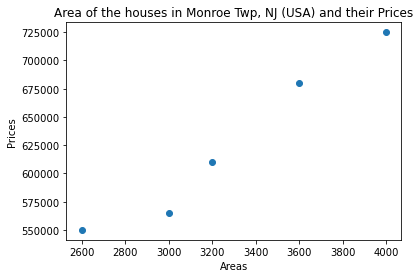

In [41]:
# Recommended to universally use the subplot method which leaves room to add more visualizations.
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set(title = 'Area of the houses in Monroe Twp, NJ (USA) and their Prices', 
       xlabel = 'Areas', 
       ylabel = 'Prices');

## Fitting the Linear Regression Model

Import linear regression model from scikit learn library and use the 'Areas' data to predict 'Prices'.

In [42]:
# Fitting the model 
model = linear_model.LinearRegression()
model.fit(dataset[['Areas']], dataset.Prices);

### Making Predictions

In [43]:
print(f'If the area is 3300, then the price of the house would be: {model.predict([[3300]])}')

If the area is 3300, then the price of the house would be: [628715.75342466]


In [16]:
print(f'If the area is 5000, then the price = {model.predict([[5000]])}')

If the area is 5000, then the price = [859554.79452055]


### Looking at the slope and the intercept

* Linear Equation: y = mx + c
* Prices = m * Areas + c

In [17]:
m = model.coef_
c = model.intercept_
print(f'm = {m[0]} and c = {c}')

m = 135.78767123287673 and c = 180616.43835616432


In [44]:
# Feature variables
Areas = dataset.Areas

# Prediction array for all the areas: 2600, 3000, 3200, 3600, 4000
Prices = model.predict(dataset[['Areas']])


### Plotting the Best-Fit-Line

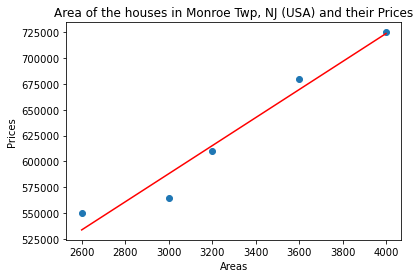

In [46]:
fig, ax = plt.subplots()
# scatter points
ax.scatter(x,y)
ax.set(title = 'Area of the houses in Monroe Twp, NJ (USA) and their Prices', 
       xlabel = 'Areas', 
       ylabel = 'Prices');

# Plotting the Fit line: ax.plot(x-axis, y-axis, color = "red")
# plot(x features, y-prediction, color = '')
ax.plot(dataset.Areas, model.predict(dataset[['Areas']]), color = "red");

### Export the Linear Regression model

Exporting the model, allows us to export the `trained intelligence` and re-use it wherever we like.

* Pickle
* Joblib - more efficient as per scikit learn documentation.

#### Pickle

In [47]:
# wb = saves as binary file
import pickle
pickle.dump(model, open("prediction-models/01-HousePricePrediction.pkl", "wb"))

### Loading to re-use the model

In [56]:
# loaded_model = pickle.load(open("../prediction-models/heartDiseasePredictionModel2.pkl", "rb"))

pkl_loaded_model = pickle.load(open("prediction-models/01-HousePricePrediction.pkl", "rb"))

#### Joblib

In [61]:
from joblib import dump, load
dump(model, '../prediction-models/01-HousePricePrediction.joblib');

In [62]:
# loading the joblib saved model for re-use
joblib_loaded_model = load('../prediction-models/01-HousePricePrediction.joblib') 

### Comparing the models

In [64]:
print(f'Trained model Prediction = {model.predict([[5000]])}')
print(f'Pickle Lib Loaded model Prediction = {pkl_loaded_model.predict([[5000]])}')
print(f'Joblib Loaded model Prediction = {joblib_loaded_model.predict([[5000]])}')

Trained model Prediction = [859554.79452055]
Pickle Lib Loaded model Prediction = [859554.79452055]
Joblib Loaded model Prediction = [859554.79452055]


## Example 2: Years vs Per Capita Income

    * Years:  2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014 2015, 2016
    * Per Capita Income: 29198.05569, 32738.2629, 36144.48, 37000, 38420, 42665.255, 42676, 41039, 35175, 345229.1963

[134363.21539489]


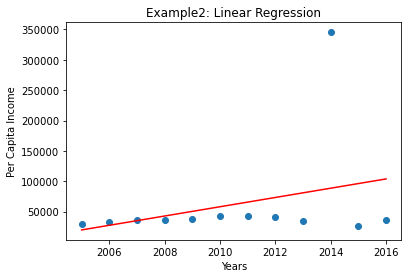

In [66]:
x = pd.Series([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])
y = pd.Series([29198.05569, 32738.2629, 36144.48, 37000, 38420, 42665.255, 42676, 41039, 35175, 345229.1963,26547.65, 36000])

dataset = pd.DataFrame({'Years': x, 'Income': y})
model = linear_model.LinearRegression()
model.fit(dataset[['Years']], dataset.Income)
fig, ax = plt.subplots()

# If, Year = 2020, then Income = ?
answer = model.predict([[2020]])
print(answer)

# Scatter points
ax.scatter(x,y)
ax.set(title = 'Example2: Linear Regression', 
       xlabel = 'Years', 
       ylabel = 'Per Capita Income');

# Plotting the Fit line: ax.plot(x-axis, y-axis, color = "red")
# plot(x features, y-prediction, color = '')
ax.plot(dataset.Years, model.predict(dataset[['Years']]), color = 'red');


# Linear Regression(Multivariate) - House Price Prediction

In [70]:
dataset = pd.read_csv("data/homeprices.csv")

# Check if there are any missing values
dataset.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [71]:
# Fill the missing value with median value of the number of bedrooms in the entire dataset
import math
median_bedrooms = math.floor(dataset.bedrooms.median())
median_bedrooms, type(median_bedrooms)

(4, int)

In [72]:
dataset.bedrooms = dataset.bedrooms.fillna(median_bedrooms)
dataset

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


The multi-variate equation looks like:
$$ y = m_1*area + m_2*bedrooms + m_3*age + c $$
The equation can be generalized as:
$$ y = m_1*x_1 + m_2*x_2 + m_3*x_3 + c $$

In [73]:
model = linear_model.LinearRegression()
x = dataset[['area', 'bedrooms', 'age']]
y = dataset[['price']]
model.fit(x,y)

m1 = model.coef_[0][0]
m2 = model.coef_[0][1]
m3 = model.coef_[0][2]
c = model.intercept_
print(f"m1 = {m1}, m2 = {m2}, m3 = {m3}, c = y-intercept = {c}")

m1 = 112.06244194213458, m2 = 23388.88007793922, m3 = -3231.7179086329634, c = y-intercept = [221323.0018654]


Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [74]:
model.predict([[3000, 3, 40]])

array([[498408.25158031]])

## Matrix operation in python

In [ ]:
# Using numpy module we can easily do matrix calculations
# a = np.matrix()

a = np.matrix([[1, 0],
               [2, 5],
               [3, 1]])

b = np.matrix([[4, 0.5],
               [2, 5],
               [0, 1]])

c = a + b

c

In [ ]:
# multiplication

c = 2 * np.matrix([[4,5],
                   [1,7]])
c

In [ ]:
a = np.matrix([[1, 2, 1, 5],
          [0, 3, 0, 4], 
          [-1, -2, 0, 0]])

b = np.matrix([[1],
              [3],
              [2],
              [1]])

c = a * b
c

In [ ]:
# Combinations of operands
a = np.matrix([[1],
               [4],
               [2]])

b = np.matrix([[0],
               [0],
               [5]])

c = np.matrix([[3],
               [0],
               [2]])

d = 3 * a + b - c/3
d.round(2)

## Exercise 1: Hypothesis
* Linear hypothesis equation of the form: y = mx + c
* Hypothesis equation: y = h(x) = 0.25x - 40
* Insert the usual column of 1's into the "houseSizes" matrix
* np.insert(arr, obj, values, axis=None)

In [ ]:
houseSizes = np.matrix([[2104],
                        [1416],
                        [1534],
                        [852]])
houseSizes = np.insert(houseSizes, 0, 1,axis=1)

parameters = np.matrix([[-40],
                    [0.25]])

c = houseSizes * parameters
print(c)

## Exercise 2: Hypothesis

In [ ]:
# We have 3 competing Linear hypothesis equation of the form: y = mx + c
# Hypothesis equation 1: y = h(x1) = 0.25x - 40
# Hypothesis equation 2: y = h(x2) = 0.1*x + 200
# Hypothesis equation 3: y = h(x3) = 0.4*x - 150

# Insert the column of 1's into the "houseSizes" matrix
# np.insert(arr, obj, values, axis=None)

houseSizes = np.matrix([[2104],
                        [1416],
                        [1534],
                        [852]])
houseSizes = np.insert(houseSizes, 0, 1,axis=1)

parameters = np.matrix([[-40, 200, 150],
                        [0.25, 0.1, 0.4]])

c = houseSizes * parameters
print(c)

* Matrix multiplication is not commutative
* Identity Matrix: Diagonal numbers are 1 and other values are 0
* a = a * identity_matrix = identity_matrix * a

## Matrix Inverse and Transpose

In [ ]:
a = np.array([[1, 2, 3], 
              [1, 3, 3], 
              [1, 2, 4]])

ainv = np.linalg.inv(a)

print(ainv)

In [ ]:
a = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])

atrans = np.transpose(a)

print(atrans)